In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv('Titanic-Dataset.csv')

In [8]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df['Age'].fillna(df['Age'].mean(), inplace=True)   # Fill missing Age values with the mean

/tmp/ipython-input-11-3444565847.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)   # Fill missing Age values with the mean


In [14]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)    # Fill missing Embarked values with the most frequent one

In [15]:
df.isnull().sum() # Let's check again if there are any missing values left

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

cabin still has null data in 687 out of ~891 rows.
so, we are gonna drop the Cabin column to keep things simple.


In [16]:
df.drop('Cabin', axis=1, inplace=True) # drop the Cabin column to keep things simple

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

No missing values left.

next step : Convert Text Columns into Numbers

In [18]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)  # converting columns into numbers

In [19]:
df.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500      True       False        True  
1          PC 17599  71.2833     False       False       False  
2  STON/O2. 3101282   7.9250     False       False        True  
3            113803  53.1000     False       False        True  
4            373450   8.0500      True       False        True

next step : Normalize the Numbers

In [20]:
scaler = StandardScaler()

df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']]) # to make Age and Fare values centered around 0

In [21]:
df[['Age', 'Fare']].head()  # Show the updated data

Age      Fare
0 -0.592481 -0.502445
1  0.638789  0.786845
2 -0.284663 -0.488854
3  0.407926  0.420730
4  0.407926 -0.486337

next step : Visualize Outliers using boxplot

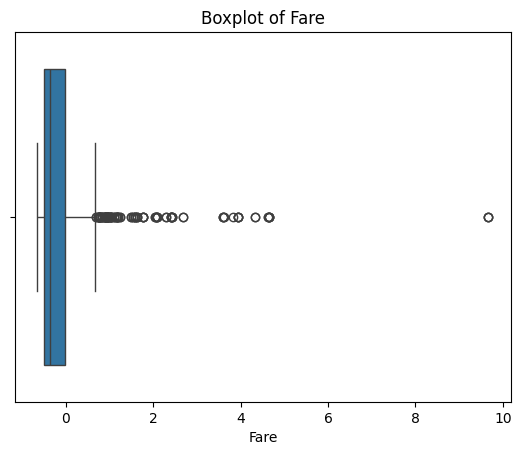

In [24]:
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare")
plt.show()

next step : remove outliers

In [25]:
df = df[df['Fare'] < 3]  # Removes extremely high fare values

In [26]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name       Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris -0.592481      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.638789      1      0   
2                             Heikkinen, Miss. Laina -0.284663      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.407926      1      0   
4                           Allen, Mr. William Henry  0.407926      0      0   

             Ticket      Fare  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171 -0.502445      True       False        True  
1          PC 17599  0.786845     False       False       False  
2  STON/O2. 3101282 -0.488854     False       False        True  
3            113803  0.420730     False       False        True  
4            373450 -0.486337      True       False        True

so, data cleaning has been done and ready for ML as raw data.